In [1]:
!unzip '/content/drive/MyDrive/Deep Learning/GK_DL/data.zip' -d '/content'

Archive:  /content/drive/MyDrive/Deep Learning/GK_DL/data.zip
   creating: /content/data/
   creating: /content/data/banh_beo/
  inflating: /content/data/banh_beo/banh_beo_119.jpg  
  inflating: /content/data/banh_beo/banh_beo_120.jpg  
  inflating: /content/data/banh_beo/banh_beo_121.jpg  
  inflating: /content/data/banh_beo/banh_beo_122.jpg  
  inflating: /content/data/banh_beo/banh_beo_123.jpg  
  inflating: /content/data/banh_beo/banh_beo_124.jpg  
  inflating: /content/data/banh_beo/banh_beo_125.jpg  
  inflating: /content/data/banh_beo/banh_beo_126.jpg  
  inflating: /content/data/banh_beo/banh_beo_127.jpg  
  inflating: /content/data/banh_beo/banh_beo_128.jpg  
  inflating: /content/data/banh_beo/banh_beo_129.jpg  
  inflating: /content/data/banh_beo/banh_beo_130.jpg  
  inflating: /content/data/banh_beo/banh_beo_131.jpg  
  inflating: /content/data/banh_beo/banh_beo_132.jpg  
  inflating: /content/data/banh_beo/banh_beo_133.jpg  
  inflating: /content/data/banh_beo/banh_beo_134

In [2]:
cd '/content/data'

/content/data


# Đọc và lưu dữ liệu

In [3]:
import os
import shutil
import numpy as np
import pandas as pd
# import splitfolders 
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,AveragePooling2D,Add,MaxPool2D
import time
from keras_preprocessing.image import ImageDataGenerator
from tqdm import tqdm

In [4]:
class_names = ['banh_beo','banh_khot','banh_mi','banh_trang_tron','banh_xeo','bun_cha','chuoi_chien','pho','sup_cua']

class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
 
nb_classes = len(class_names) 
IMAGE_SIZE = (150, 150) 
class_names_label

{'banh_beo': 0,
 'banh_khot': 1,
 'banh_mi': 2,
 'banh_trang_tron': 3,
 'banh_xeo': 4,
 'bun_cha': 5,
 'chuoi_chien': 6,
 'pho': 7,
 'sup_cua': 8}

In [5]:
def plot_accuracy_loss(history):
  
  fig = plt.figure(figsize=(15,10))
  plt.subplot(221)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.legend(['accuracy', 'val_accuracy'], loc = 'upper left')

  plt.subplot(222)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend(['loss', 'val_loss'], loc = 'upper left')
  plt.show()

def display_random_image(class_names, images, labels):

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

In [6]:
def load_data(path,folders):  
  

  
  # datasets = ['flowers/train_data']
  # output = []
    
  
  # for dataset in datasets:
      
    images = []
    labels = []
    
    # print("Loading {}".format(dataset))
    
    
    for folder in os.listdir(path):
      if folder not in folders:
        continue      
      label = class_names_label[folder]
      
    
      for file in tqdm(os.listdir(os.path.join(path, folder))):

          
        img_path = os.path.join(os.path.join(path, folder), file)
      
        if img_path.split('.')[-1] != 'jpg':
          continue

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE) 
        
      
        images.append(image)
        labels.append(label)
            
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')   
      

    return images, labels

In [7]:
path = '/content/data'

In [8]:
X_train_agu, y_train_agu = load_data(path,class_names[:9])

100%|██████████| 542/542 [00:09<00:00, 60.15it/s]


In [9]:
y_train_agu.shape

(4467,)

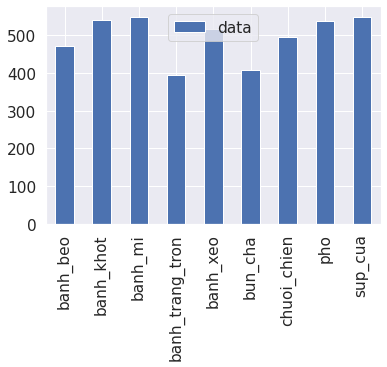

In [10]:
_, train_counts = np.unique(y_train_agu, return_counts=True)

pd.DataFrame({'data': train_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

# Phát sinh thêm dữ liệu

In [11]:
import tensorflow as tf   
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
x, y = [], []
for i in range(len(y_train_agu)):
    img = tf.expand_dims(X_train_agu[i], 0)
    for j in range(2):
        augmented_image= data_augmentation(img)
        x.append(augmented_image)
        y.append(y_train_agu[i])

In [13]:
x = np.array(x).reshape(-1, 150, 150, 3)
y = np.array(y)
x.shape, y.shape


((8934, 150, 150, 3), (8934,))

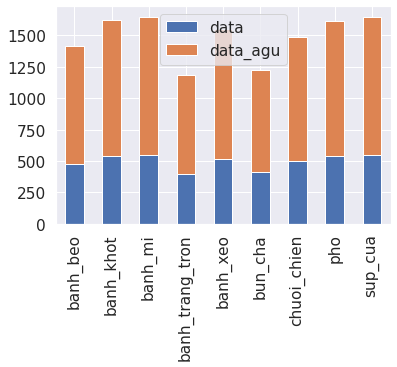

In [14]:
_, data_counts = np.unique(y_train_agu, return_counts=True)
_, data_agu_counts = np.unique(y, return_counts=True)

pd.DataFrame({'data': data_counts, 'data_agu': data_agu_counts},
             index=class_names
            ).plot.bar(stacked=True)
plt.show()

# Chia tập dữ liệu

In [15]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1)
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.2)

In [16]:
train = train_y.shape[0]
test = test_y.shape[0]
val = val_y.shape[0]

print ("Số lượng mẫu train: {}".format(train))
print ("Số lượng mẫu test: {}".format(test))
print ("Số lượng mẫu val: {}".format(val))
print ("Mỗi hình ảnh có kích thước: {}".format(IMAGE_SIZE))

Số lượng mẫu train: 7147
Số lượng mẫu test: 894
Số lượng mẫu val: 1787
Mỗi hình ảnh có kích thước: (150, 150)


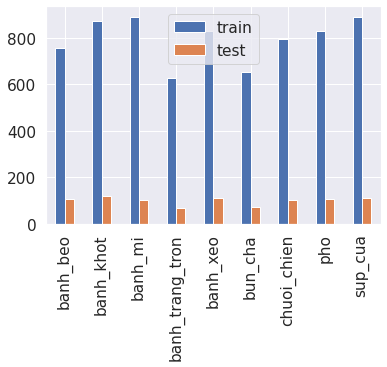

In [17]:
_, train_counts = np.unique(train_y, return_counts=True)
_, test_counts = np.unique(test_y, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

In [18]:
train_x = train_x / 255.0
test_x = test_x / 255.0
val_x = val_x / 255.0

In [19]:
train_x[1]

array([[[0.57114875, 0.54764265, 0.3965064 ],
        [0.5284244 , 0.5588403 , 0.5906934 ],
        [0.5819604 , 0.6493374 , 0.7050819 ],
        ...,
        [0.7810843 , 0.6845442 , 0.1161501 ],
        [0.82785463, 0.7140636 , 0.20926695],
        [0.81263506, 0.6784926 , 0.13255204]],

       [[0.5577753 , 0.53756857, 0.3850539 ],
        [0.53622735, 0.5800283 , 0.59211993],
        [0.5723966 , 0.63864726, 0.6872472 ],
        ...,
        [0.7751415 , 0.6680301 , 0.10980301],
        [0.7909998 , 0.6668851 , 0.13513957],
        [0.8083903 , 0.6706353 , 0.15061074]],

       [[0.57335204, 0.5442399 , 0.3866069 ],
        [0.53639257, 0.5873746 , 0.6226882 ],
        [0.610532  , 0.6774888 , 0.7475943 ],
        ...,
        [0.803361  , 0.70125407, 0.14847669],
        [0.7668585 , 0.6441573 , 0.09125789],
        [0.77329046, 0.6455582 , 0.14174211]],

       ...,

       [[0.83908904, 0.68452406, 0.08402231],
        [0.8298329 , 0.6853429 , 0.09704715],
        [0.85472083, 0

In [20]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization,Dense,Flatten,Dropout, Add
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Input,Model
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import tensorflow as tf 

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Train mô hình tự xây


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(nb_classes, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 9)                

In [ ]:
history = model.fit(train_x, train_y, batch_size=64, epochs=10, validation_data =(val_x, val_y))


Epoch 1/10
112/112 [==============================] - 38s 73ms/step - loss: 2.1637 - accuracy: 0.1950 - val_loss: 1.8640 - val_accuracy: 0.3397
Epoch 2/10
112/112 [==============================] - 7s 61ms/step - loss: 1.6560 - accuracy: 0.4109 - val_loss: 1.6179 - val_accuracy: 0.4287
Epoch 3/10
112/112 [==============================] - 7s 61ms/step - loss: 1.3294 - accuracy: 0.5359 - val_loss: 1.5160 - val_accuracy: 0.4605
Epoch 4/10
112/112 [==============================] - 7s 62ms/step - loss: 0.9720 - accuracy: 0.6750 - val_loss: 1.6627 - val_accuracy: 0.4415
Epoch 5/10
112/112 [==============================] - 7s 62ms/step - loss: 0.6102 - accuracy: 0.8065 - val_loss: 1.7831 - val_accuracy: 0.4594
Epoch 6/10
112/112 [==============================] - 7s 62ms/step - loss: 0.3543 - accuracy: 0.8986 - val_loss: 2.0671 - val_accuracy: 0.4695
Epoch 7/10
112/112 [==============================] - 7s 62ms/step - loss: 0.1750 - accuracy: 0.9566 - val_loss: 2.4549 - val_accuracy: 0.457

In [ ]:
model.evaluate(test_x,test_y)

28/28 [==============================] - 1s 26ms/step - loss: 0.6770 - accuracy: 0.8870


[0.6769588589668274, 0.8870245814323425]

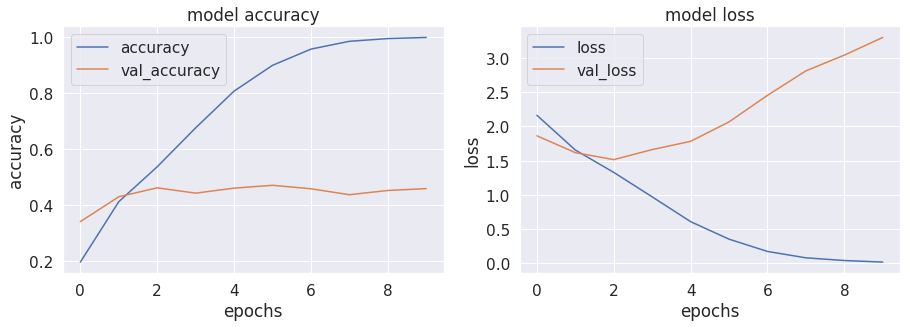

In [ ]:
plot_accuracy_loss(history)

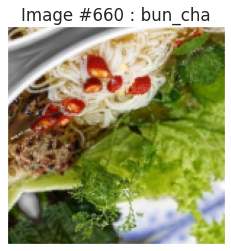

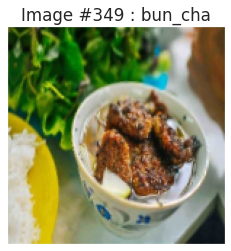

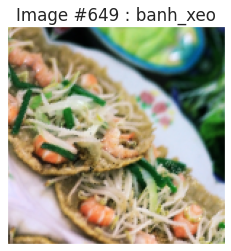

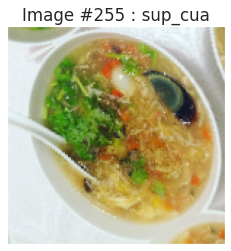

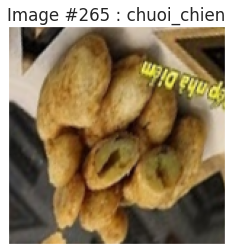

In [ ]:
predictions = model.predict(test_x)    
pred_labels = np.argmax(predictions, axis = 1) 
for i in range(5):
  display_random_image(class_names, test_x, pred_labels)

In [ ]:
ipt = Input(shape = (150,150,3))
x = Conv2D(32, 3, 1, activation='relu', padding = 'valid')(ipt)
x = Conv2D(32, 3, 1, activation='relu', padding = 'valid')(x)
mp = MaxPool2D()(x)

x = Conv2D(32, 3, 1, activation='relu', padding='same')(mp)
x = Conv2D(32, 3, 1, activation='relu', padding='same')(x)
x = Add()([x, mp])
mp = MaxPool2D()(x)
x = Dropout(0.2)(mp)

x = Conv2D(256, 3, 1, activation='relu', padding='same')(x)
x = Conv2D(256, 3, 1, activation='relu', padding='same')(x)
x = Dropout(0.2)(mp)
mp = MaxPool2D()(x)
x = Dropout(0.2)(mp)


x = Conv2D(256, 3, 1, activation='relu', padding='same')(x)
x = Conv2D(256, 3, 1, activation='relu', padding='same')(x)
x = Dropout(0.2)(mp)
x = Add()([x, mp])
mp = MaxPool2D()(x)
x = Dropout(0.2)(mp)


x = Conv2D(256, 3, 1, activation='relu', padding='same')(x)
x = Conv2D(512, 3, 1, activation='relu', padding='same')(x)
x = Dropout(0.2)(mp)
mp = MaxPool2D()(x)


x = Conv2D(512, 3, 1, activation='relu', padding='same')(mp)
x = Dropout(0.2)(mp)
x = Add()([x, mp])
mp = MaxPool2D()(x)


x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(nb_classes, activation='softmax')(x)


model_n = tf.keras.Model(inputs = ipt, outputs = x)
model_n.compile( loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_n.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 148, 148, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 146, 146, 32) 9248        conv2d_2[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 73, 73, 32)   0           conv2d_3[0][0]                   
______________________________________________________________________________________________

In [ ]:
history1 = model_n.fit(train_x, train_y, batch_size=64, epochs=30, validation_data =(val_x, val_y))


Epoch 1/30
112/112 [==============================] - 20s 162ms/step - loss: 2.1133 - accuracy: 0.2018 - val_loss: 1.8911 - val_accuracy: 0.3492
Epoch 2/30
112/112 [==============================] - 16s 146ms/step - loss: 1.7597 - accuracy: 0.3636 - val_loss: 1.7162 - val_accuracy: 0.4079
Epoch 3/30
112/112 [==============================] - 16s 144ms/step - loss: 1.5866 - accuracy: 0.4336 - val_loss: 1.6267 - val_accuracy: 0.4494
Epoch 4/30
112/112 [==============================] - 16s 144ms/step - loss: 1.4166 - accuracy: 0.4988 - val_loss: 1.4736 - val_accuracy: 0.4986
Epoch 5/30
112/112 [==============================] - 16s 144ms/step - loss: 1.3308 - accuracy: 0.5324 - val_loss: 1.3528 - val_accuracy: 0.5585
Epoch 6/30
112/112 [==============================] - 16s 144ms/step - loss: 1.2263 - accuracy: 0.5745 - val_loss: 1.3293 - val_accuracy: 0.5881
Epoch 7/30
112/112 [==============================] - 16s 146ms/step - loss: 1.1825 - accuracy: 0.5833 - val_loss: 1.2380 - val_ac

In [ ]:
model_n.evaluate(test_x, test_y)

28/28 [==============================] - 2s 49ms/step - loss: 0.6391 - accuracy: 0.8490


[0.6391162276268005, 0.8489933013916016]

In [ ]:
model_n.save('/content/drive/MyDrive/Deep Learning/GK_DL/model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Deep Learning/GK_DL/model/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


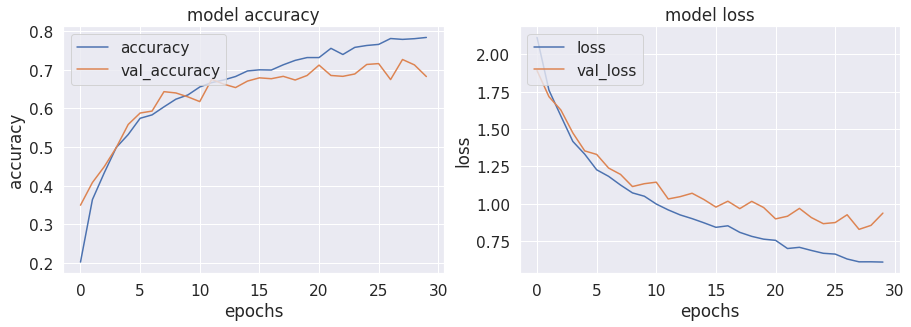

In [ ]:
plot_accuracy_loss(history1)

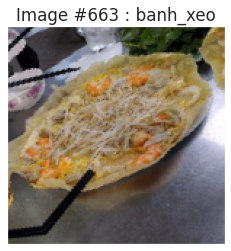

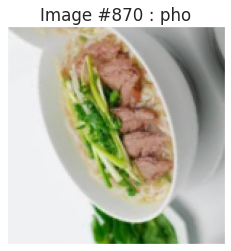

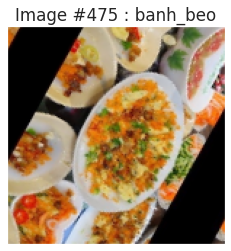

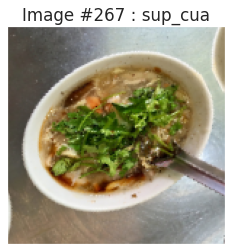

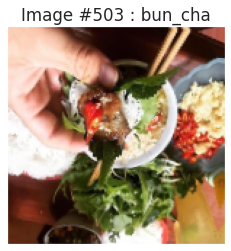

In [ ]:
predictions = model_n.predict(test_x)    
pred_labels = np.argmax(predictions, axis = 1) 
for i in range(5):
  display_random_image(class_names, test_x, pred_labels)

# Pre-train model

VGG16


In [21]:
from keras.applications.vgg16 import VGG16 
vgg16= VGG16(weights='imagenet', input_shape=(150,150,3), include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [22]:
for layer in vgg16.layers:
    layer.trainable = False

In [23]:
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dense(nb_classes, activation='softmax')(x)
model_tf16 = Model(vgg16.input, x)
model_tf16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [24]:
model_tf16.compile( loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history2 = model_tf16.fit(train_x, train_y, batch_size=64, epochs=30, validation_data =(val_x, val_y))


Epoch 1/30
112/112 [==============================] - 85s 426ms/step - loss: 1.4980 - accuracy: 0.4725 - val_loss: 0.9720 - val_accuracy: 0.6682
Epoch 2/30
112/112 [==============================] - 33s 292ms/step - loss: 1.0691 - accuracy: 0.6228 - val_loss: 0.8402 - val_accuracy: 0.7135
Epoch 3/30
112/112 [==============================] - 33s 291ms/step - loss: 0.9207 - accuracy: 0.6825 - val_loss: 0.8223 - val_accuracy: 0.7174
Epoch 4/30
112/112 [==============================] - 33s 292ms/step - loss: 0.8133 - accuracy: 0.7178 - val_loss: 0.7596 - val_accuracy: 0.7314
Epoch 5/30
112/112 [==============================] - 33s 291ms/step - loss: 0.7101 - accuracy: 0.7511 - val_loss: 0.7657 - val_accuracy: 0.7314
Epoch 6/30
112/112 [==============================] - 33s 291ms/step - loss: 0.6211 - accuracy: 0.7849 - val_loss: 0.6957 - val_accuracy: 0.7599
Epoch 7/30
112/112 [==============================] - 33s 291ms/step - loss: 0.5545 - accuracy: 0.8062 - val_loss: 0.7627 - val_ac

In [ ]:
model_tf16.evaluate(test_x, test_y)

28/28 [==============================] - 14s 321ms/step - loss: 0.2324 - accuracy: 0.9575


[0.2324315905570984, 0.9574943780899048]

In [ ]:
model_tf16.save('/content/drive/MyDrive/Deep Learning/GK_DL/modelVGG16.h5')

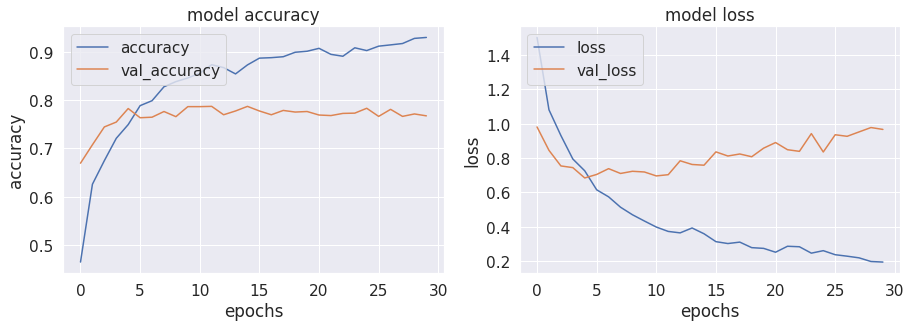

In [ ]:
plot_accuracy_loss(history2)

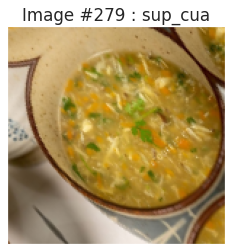

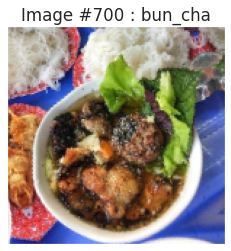

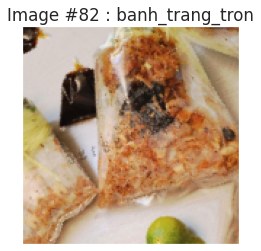

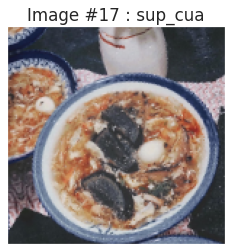

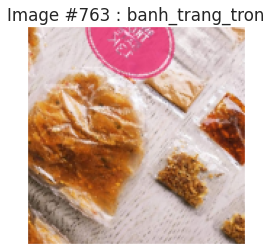

In [ ]:
predictions = model_tf16.predict(test_x)    
pred_labels = np.argmax(predictions, axis = 1) 
for i in range(5):
  display_random_image(class_names, test_x, pred_labels)

ResNet

In [ ]:
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.applications.resnet_v2 import ResNet152V2

In [ ]:
base_model = ResNet152V2(include_top= False,
                         input_shape=(150, 150, 3),
                         weights='imagenet',
                         pooling='avg')
base_model.trainable = False

234553344/234545216 [==============================] - 3s 0us/step


In [ ]:
base_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 77, 77, 64)   0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [ ]:
from keras import activations
import keras
model_resnet = keras.models.Sequential()
model_resnet.add(base_model)
model_resnet.add(keras.layers.Dropout(0.2))
model_resnet.add(keras.layers.Dense(512, activation = 'relu'))
model_resnet.add(keras.layers.Dropout(0.5))
model_resnet.add(keras.layers.Dense(64, activation = 'relu'))
model_resnet.add(keras.layers.Dropout(0.4))
model_resnet.add(keras.layers.Dense(9, activation = 'softmax'))

In [ ]:
model_resnet.compile( loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history3 = model_resnet.fit(train_x, train_y, batch_size=64, epochs=30, validation_data =(val_x, val_y))


Epoch 1/30
112/112 [==============================] - 102s 766ms/step - loss: 1.6654 - accuracy: 0.4196 - val_loss: 0.9319 - val_accuracy: 0.6894
Epoch 2/30
112/112 [==============================] - 75s 670ms/step - loss: 1.1210 - accuracy: 0.6148 - val_loss: 0.7874 - val_accuracy: 0.7359
Epoch 3/30
112/112 [==============================] - 75s 670ms/step - loss: 0.9306 - accuracy: 0.6857 - val_loss: 0.7315 - val_accuracy: 0.7527
Epoch 4/30
112/112 [==============================] - 75s 669ms/step - loss: 0.8353 - accuracy: 0.7211 - val_loss: 0.6953 - val_accuracy: 0.7706
Epoch 5/30
112/112 [==============================] - 75s 670ms/step - loss: 0.7477 - accuracy: 0.7512 - val_loss: 0.6634 - val_accuracy: 0.7745
Epoch 6/30
112/112 [==============================] - 75s 668ms/step - loss: 0.6802 - accuracy: 0.7747 - val_loss: 0.6579 - val_accuracy: 0.7773
Epoch 7/30
112/112 [==============================] - 75s 667ms/step - loss: 0.6193 - accuracy: 0.7915 - val_loss: 0.6119 - val_a

In [ ]:
model_resnet.save('/content/drive/MyDrive/Deep Learning/GK_DL/modelResNet')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Deep Learning/GK_DL/modelResNet/assets


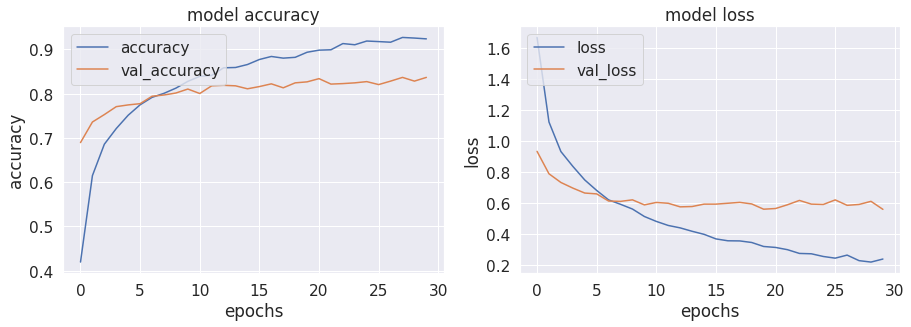

In [ ]:
plot_accuracy_loss(history3)

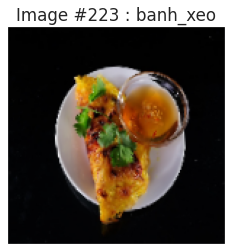

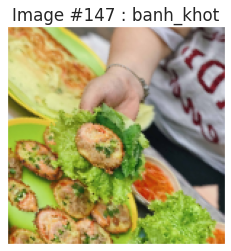

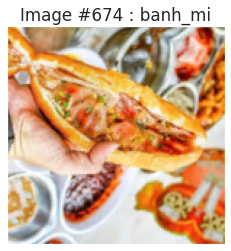

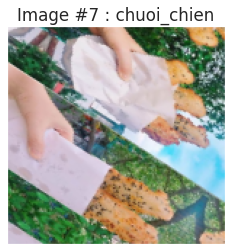

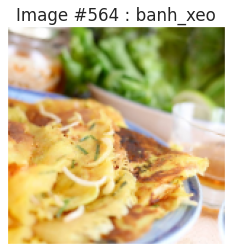

In [ ]:
predictions = model_resnet.predict(test_x)    
pred_labels = np.argmax(predictions, axis = 1) 
for i in range(5):
  display_random_image(class_names, test_x, pred_labels)

Inception V3

In [ ]:
base_model_inception = tf.keras.applications.inception_v3.InceptionV3(include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
base_model_inception.trainable=False

In [ ]:
inputs = tf.keras.layers.Input(shape=(150,150,3), name='input_layer')
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)
x = base_model_inception(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(nb_classes, activation='softmax')(x)


In [ ]:
model_incep = tf.keras.Model(inputs, outputs)
model_incep.compile( loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_incep.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 18441     
Total params: 21,821,225
Trainable params: 18,441
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
history4 = model_incep.fit(train_x, train_y, batch_size=64, epochs=30, validation_data =(val_x, val_y))


Epoch 1/30
112/112 [==============================] - 33s 226ms/step - loss: 1.3634 - accuracy: 0.5711 - val_loss: 0.9073 - val_accuracy: 0.6961
Epoch 2/30
112/112 [==============================] - 20s 183ms/step - loss: 0.7293 - accuracy: 0.7557 - val_loss: 0.8390 - val_accuracy: 0.7224
Epoch 3/30
112/112 [==============================] - 21s 184ms/step - loss: 0.5960 - accuracy: 0.7966 - val_loss: 0.7484 - val_accuracy: 0.7431
Epoch 4/30
112/112 [==============================] - 20s 182ms/step - loss: 0.4870 - accuracy: 0.8360 - val_loss: 0.6935 - val_accuracy: 0.7672
Epoch 5/30
112/112 [==============================] - 21s 184ms/step - loss: 0.4302 - accuracy: 0.8549 - val_loss: 0.6950 - val_accuracy: 0.7655
Epoch 6/30
112/112 [==============================] - 20s 183ms/step - loss: 0.3850 - accuracy: 0.8725 - val_loss: 0.6876 - val_accuracy: 0.7722
Epoch 7/30
112/112 [==============================] - 20s 182ms/step - loss: 0.3453 - accuracy: 0.8872 - val_loss: 0.6814 - val_ac

In [ ]:
model_incep.save('/content/drive/MyDrive/Deep Learning/GK_DL/modelIncep')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Deep Learning/GK_DL/modelIncep/assets


In [ ]:
model_incep.evaluate(test_x, test_y)

28/28 [==============================] - 5s 146ms/step - loss: 0.2288 - accuracy: 0.9385


[0.22881445288658142, 0.9384787678718567]

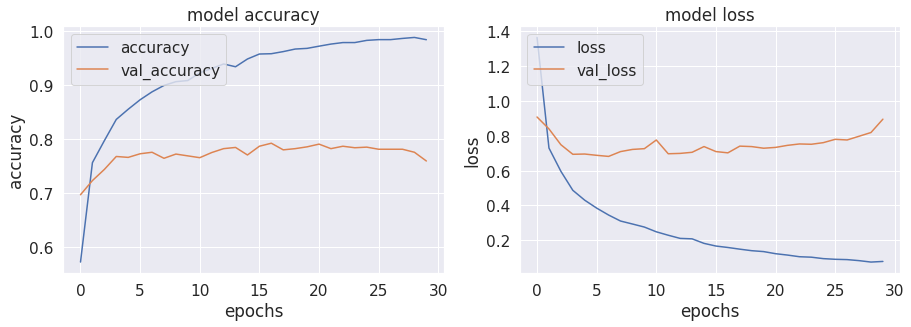

In [ ]:
plot_accuracy_loss(history4)

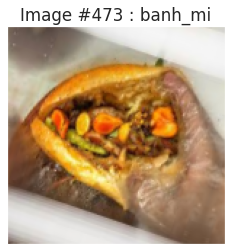

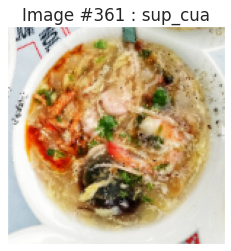

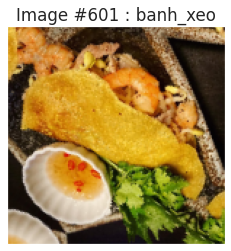

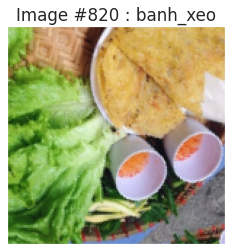

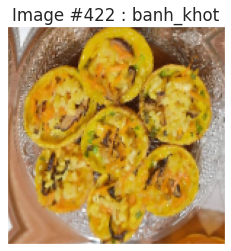

In [ ]:
predictions = model_incep.predict(test_x)    
pred_labels = np.argmax(predictions, axis = 1) 
for i in range(5):
  display_random_image(class_names, test_x, pred_labels)

MobileNetV2

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
base_model_mobilenet =  MobileNetV2(input_shape=(150,150,3),weights='imagenet',include_top=False) 

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
x=base_model_mobilenet.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) # FC layer 1
x=Dense(64,activation='relu')(x)   # FC layer 2
out=Dense(nb_classes,activation='softmax')(x) #final layer with softmax activation

model_mobile=Model(inputs=base_model_mobilenet.input,outputs=out)

model_mobile.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
model_mobile.compile( loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history5 = model_mobile.fit(train_x, train_y, batch_size=64, epochs=30, validation_data =(val_x, val_y))


Epoch 1/30
112/112 [==============================] - 80s 391ms/step - loss: 0.8000 - accuracy: 0.7452 - val_loss: 8.3008 - val_accuracy: 0.1707
Epoch 2/30
112/112 [==============================] - 41s 368ms/step - loss: 0.3845 - accuracy: 0.8813 - val_loss: 6.3394 - val_accuracy: 0.2250
Epoch 3/30
112/112 [==============================] - 42s 372ms/step - loss: 0.3156 - accuracy: 0.9023 - val_loss: 8.3841 - val_accuracy: 0.3318
Epoch 4/30
112/112 [==============================] - 41s 366ms/step - loss: 0.2138 - accuracy: 0.9324 - val_loss: 6.8890 - val_accuracy: 0.3872
Epoch 5/30
112/112 [==============================] - 41s 366ms/step - loss: 0.1727 - accuracy: 0.9473 - val_loss: 10.8541 - val_accuracy: 0.3212
Epoch 6/30
112/112 [==============================] - 41s 369ms/step - loss: 0.1674 - accuracy: 0.9470 - val_loss: 7.3814 - val_accuracy: 0.3151
Epoch 7/30
112/112 [==============================] - 41s 367ms/step - loss: 0.1361 - accuracy: 0.9575 - val_loss: 13.4822 - val_

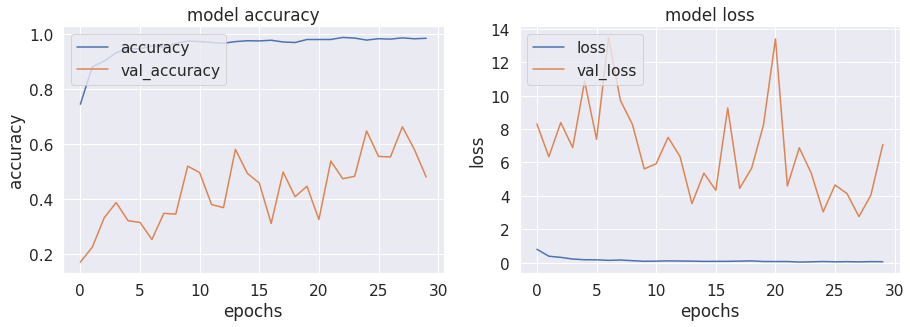

In [ ]:
plot_accuracy_loss(history5)

In [ ]:
model_mobile.evaluate(test_x, test_y)

28/28 [==============================] - 2s 66ms/step - loss: 6.7138 - accuracy: 0.5123


[6.713785648345947, 0.5123042464256287]

In [ ]:
model_mobile.save('/content/drive/MyDrive/Deep Learning/GK_DL/modelMobilenet')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Deep Learning/GK_DL/modelMobilenet/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


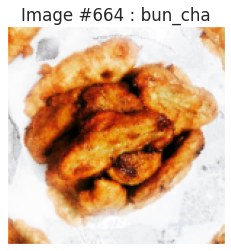

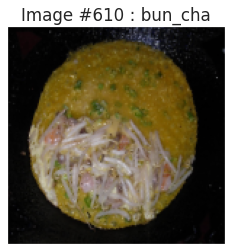

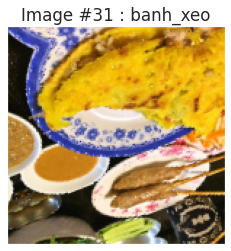

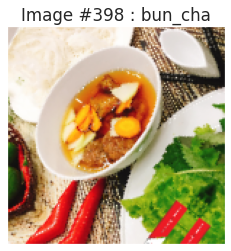

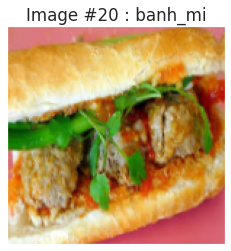

In [ ]:
predictions = model_mobile.predict(test_x)    
pred_labels = np.argmax(predictions, axis = 1) 
for i in range(5):
  display_random_image(class_names, test_x, pred_labels)